# BUSINESS UNDERSTANDING

Movies/Film industry is a multi-billion dollar industry that has been growing rapidly in recent years due to various factors that have ensured a steady rise from the analog to digital eras.

We've witnessed improvements in distribution, quality, genres, acting, among other things.

One of the major factors has been the internet, which today is easily accessible to majority of the population worldwide. This has lead to the indroduction of various streaming platforms, making it easy for viewers to download any type of movies they want to watch. Hence we have migrated from eras where we had to use compact disks(CD's/DVD's) which needed a physical store to buy them, to now using streaming platforms at the comfort of your home without needing to go out and get access to a particular movie, as long as you have internet access.

Other factors have also majorly contributed to its growth, ie,
- the use of various visual effects like CGI,VFX ensuring the movie is of high quality.
- Large investments to ensure the logistics in a movie are met and the movie is finished and distributed on time.
- Changing audience preferences ie genre preferences and cultural diversity has lead to content that caters to various audience.
- Consumer spending due to strong economy can lead to high box office revenues.
- Production and creative factors ie, script quality, acting skills, marketing and promotions can generate great revenues.


However, all industries have their own risks that can impact various aspects in production like piracy, economic downturns, budget overruns, changing audience preferences, weather-related risks, casts illness/injury, poor box-office run, among other things.

Therefore it is necessary to try and mitigate all/most of these risks during the planning and production periods. One of the main ways to reduce risks is by factoring data analysis to know the current trends and target audience.

## OBJECTIVES

- Find Which genres tend to earn most revenues
- Which genres recieve the highest ratings.
- Finding out the total gross based on genres.
- Finding the ratios between foreign gross and domestic gross.
- Estimate whether a movie was a box office success or failure based on the ratings.
- Identify the most profitable genres globally based on total gross.
- Identify the movie production patterns over the years.
- Identify which genres to invest based on the total gross and average ratings.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# STEP 1: Load the datasets
# -------------------------------
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df2 = pd.read_csv('imdb.title.basics.csv.gz')
df3 = pd.read_csv('imdb.title.ratings.csv.gz')

In [3]:
# STEP 2: Merge the datasets

df = pd.merge(df1, df2, left_on='title', right_on='primary_title')
df = pd.merge(df, df3, on='tconst')
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


*the three datasets have been merged together. df1 starts from the left with title column to the year column. on the right df2 then continues from primary title colum to genres colum. Then df 3 combines with the two datasets with average ratings and numvotes columns.*

*the 'tconst' column has been merged from df2 and df3 as they share a common column*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   primary_title    3027 non-null   object 
 7   original_title   3027 non-null   object 
 8   start_year       3027 non-null   int64  
 9   runtime_minutes  2980 non-null   float64
 10  genres           3020 non-null   object 
 11  averagerating    3027 non-null   float64
 12  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 307.6+ KB


In [32]:
# Converting foreign_gross column into a float type and then create a new column named total_gross

df['foreign_gross'] = df['foreign_gross'].astype(str).str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803 entries, 0 to 3001
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           1803 non-null   object  
 1   year            1803 non-null   int64   
 2   genres          1803 non-null   object  
 3   averagerating   1803 non-null   float64 
 4   domestic_gross  1803 non-null   float64 
 5   foreign_gross   1803 non-null   float64 
 6   total_gross     1803 non-null   float64 
 7   domestic_ratio  1803 non-null   float64 
 8   foreign_ratio   1803 non-null   float64 
 9   rating_level    1803 non-null   category
dtypes: category(1), float64(6), int64(1), object(2)
memory usage: 142.7+ KB


/tmp/ipython-input-3412373306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].astype(str).str.replace(',', '').astype(float)


*The `foreign gross column` has successfully been converted as a float type*

In [6]:
# adding a new column 'total_gross' to the dataset

df = df.assign(total_gross = df['domestic_gross'] + df['foreign_gross'])
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,6.239000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823,NaN
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9,NaN
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016,NaN
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270,NaN


*Chosing the `key columns` i'm going to work with for futher analysis in the code below*

In [7]:
key_columns = ['title', 'year', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross', 'total_gross']
df = df[key_columns]
df

,title,year,genres,averagerating,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0,1.067000e+09
1,Inception,2010,"Action,Adventure,Sci-Fi",8.8,292600000.0,535700000.0,8.283000e+08
2,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,238700000.0,513900000.0,7.526000e+08
3,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,300500000.0,398000000.0,6.985000e+08
4,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,312400000.0,311500000.0,6.239000e+08
...,...,...,...,...,...,...,...
3022,Souvenir,2018,"Drama,Music,Romance",6.0,11400.0,NaN,NaN
3023,Souvenir,2018,"Comedy,Romance",5.9,11400.0,NaN,NaN
3024,Beauty and the Dogs,2018,"Crime,Drama,Thriller",7.0,8900.0,NaN,NaN
3025,The Quake,2018,"Action,Drama,Thriller",6.2,6200.0,NaN,NaN


In [8]:
type(df)

pandas.core.frame.DataFrame

# EDA - DATA CLEANING

In [9]:
df.columns

Index(['title', 'year', 'genres', 'averagerating', 'domestic_gross',
       'foreign_gross', 'total_gross'],
      dtype='object')

- Checking for missing values

In [10]:
# checking for missing values in each column

df.isna().sum()

,0
title,0
year,0
genres,7
averagerating,0
domestic_gross,22
foreign_gross,1195
total_gross,1217


In [11]:
# checking for the propotion of missing values

df.isna().mean()

,0
title,0.000000
year,0.000000
genres,0.002313
averagerating,0.000000
domestic_gross,0.007268
foreign_gross,0.394780
total_gross,0.402048


*the `foreign_gross` and `total_gross` columns have ~39% and ~40% of null values. this is a significant proportion*

In [12]:
# droping the missing values found

df = df.dropna()
df

,title,year,genres,averagerating,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0,1.067000e+09
1,Inception,2010,"Action,Adventure,Sci-Fi",8.8,292600000.0,535700000.0,8.283000e+08
2,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,238700000.0,513900000.0,7.526000e+08
3,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,300500000.0,398000000.0,6.985000e+08
4,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,312400000.0,311500000.0,6.239000e+08
...,...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,2018,"Action,Adventure,Animation",8.0,491000.0,1700000.0,2.191000e+06
2930,I Still See You,2018,"Fantasy,Thriller",5.7,1400.0,1500000.0,1.501400e+06
2940,The Catcher Was a Spy,2018,"Biography,Drama,War",6.2,725000.0,229000.0,9.540000e+05
2959,Time Freak,2018,"Comedy,Drama,Romance",5.7,10000.0,256000.0,2.660000e+05


In [13]:
# Let's check if we still have any missing values

df.isnull().sum()

,0
title,0
year,0
genres,0
averagerating,0
domestic_gross,0
foreign_gross,0
total_gross,0


- Checking for any duplicated values

In [14]:
df.duplicated().value_counts()

,count
False,1803


*there are no duplicates*

- Outlier Detection and handling

Text(0.5, 1.0, 'Gross Revenue Boxplot')

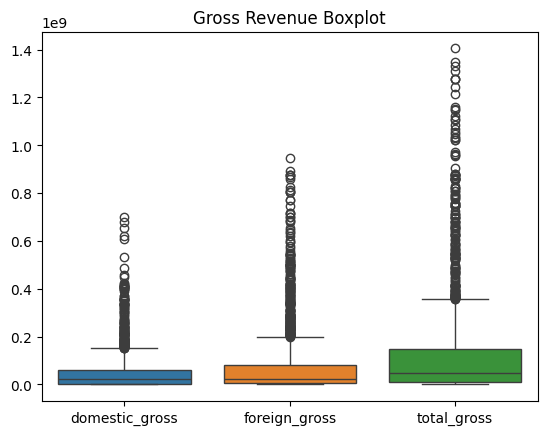

In [15]:
# Checking for outliers by plotting a boxplot using seaborn

sns.boxplot(data=df[['domestic_gross', 'foreign_gross', 'total_gross']])
plt.title('Gross Revenue Boxplot')


All the gross revenue columns contain many outliers. They can be removed easily using IQR, but given that this is a movie dataset, we shall keep the outliers since they represent the real data.

##  Feature Engineering

*finding out the performance patterns between domestic and international audiences*

In [33]:
# finding out the performance ratio between the domestic audience and foreign audience
# using the .loc method

df.loc[:, 'domestic_ratio'] = df['domestic_gross'] / df['total_gross']
df.loc[:, 'foreign_ratio'] = df['foreign_gross'] / df['total_gross']
df

,title,year,genres,averagerating,domestic_gross,foreign_gross,total_gross,domestic_ratio,foreign_ratio,rating_level
0,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0,1.067000e+09,0.388941,0.611059,blockbuster
1,Inception,2010,"Action,Adventure,Sci-Fi",8.8,292600000.0,535700000.0,8.283000e+08,0.353254,0.646746,blockbuster
2,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,238700000.0,513900000.0,7.526000e+08,0.317167,0.682833,average
3,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,300500000.0,398000000.0,6.985000e+08,0.430208,0.569792,poor
4,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,312400000.0,311500000.0,6.239000e+08,0.500721,0.499279,average
...,...,...,...,...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,2018,"Action,Adventure,Animation",8.0,491000.0,1700000.0,2.191000e+06,0.224099,0.775901,average
2930,I Still See You,2018,"Fantasy,Thriller",5.7,1400.0,1500000.0,1.501400e+06,0.000932,0.999068,average
2940,The Catcher Was a Spy,2018,"Biography,Drama,War",6.2,725000.0,229000.0,9.540000e+05,0.759958,0.240042,average
2959,Time Freak,2018,"Comedy,Drama,Romance",5.7,10000.0,256000.0,2.660000e+05,0.037594,0.962406,average


*finding out the `Rating level` used  based on the average rating. 0-5 rating indicating `poor`, 5-8 rating indicating `average` movie, 8-10 indicating the movie was a `blockbuster`*

In [34]:
df.loc[:, 'rating_level'] = pd.cut(df['averagerating'], bins=[0, 5, 8, 10], labels=['poor', 'average', 'blockbuster'])
df

,title,year,genres,averagerating,domestic_gross,foreign_gross,total_gross,domestic_ratio,foreign_ratio,rating_level
0,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,415000000.0,652000000.0,1.067000e+09,0.388941,0.611059,blockbuster
1,Inception,2010,"Action,Adventure,Sci-Fi",8.8,292600000.0,535700000.0,8.283000e+08,0.353254,0.646746,blockbuster
2,Shrek Forever After,2010,"Adventure,Animation,Comedy",6.3,238700000.0,513900000.0,7.526000e+08,0.317167,0.682833,average
3,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",5.0,300500000.0,398000000.0,6.985000e+08,0.430208,0.569792,poor
4,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,312400000.0,311500000.0,6.239000e+08,0.500721,0.499279,average
...,...,...,...,...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,2018,"Action,Adventure,Animation",8.0,491000.0,1700000.0,2.191000e+06,0.224099,0.775901,average
2930,I Still See You,2018,"Fantasy,Thriller",5.7,1400.0,1500000.0,1.501400e+06,0.000932,0.999068,average
2940,The Catcher Was a Spy,2018,"Biography,Drama,War",6.2,725000.0,229000.0,9.540000e+05,0.759958,0.240042,average
2959,Time Freak,2018,"Comedy,Drama,Romance",5.7,10000.0,256000.0,2.660000e+05,0.037594,0.962406,average


## EDA

-Univariate analysis

In [18]:
# Checking the statistical summaries

df.describe()

,year,averagerating,domestic_gross,foreign_gross,total_gross,domestic_ratio,foreign_ratio
count,1803.000000,1803.000000,1.803000e+03,1.803000e+03,1.803000e+03,1803.000000,1803.000000
mean,2013.668885,6.451636,4.971950e+07,7.911398e+07,1.288335e+08,0.405832,0.594168
std,2.570356,1.010874,8.047399e+07,1.394153e+08,2.088373e+08,0.267331,0.267331
min,2010.000000,1.600000,4.000000e+02,6.000000e+02,1.080000e+04,0.000037,0.000002
25%,2011.000000,5.900000,1.300000e+06,4.800000e+06,1.000000e+07,0.194754,0.409322
50%,2014.000000,6.500000,2.080000e+07,2.130000e+07,4.810000e+07,0.403066,0.596934
75%,2016.000000,7.200000,6.155000e+07,8.215000e+07,1.489000e+08,0.590678,0.805246
max,2018.000000,9.200000,7.001000e+08,9.464000e+08,1.405400e+09,0.999998,0.999963


- The earliest movie produced was in 2010, and the latest movie is 2018.
- Highest rating is a 9.2 and the least is a 1.6, the average rating is 6.4
-etc....

*Let's now get to know the number of each genre and sub-genre found in the dataset. Then create a `bar graph` to show the distribution of the `top 10 most popular genre categories` in the dataset*

In [19]:
genre_counts = df['genres'].value_counts()
genre_counts

,count
genres,
Drama,127
"Comedy,Drama",74
"Adventure,Animation,Comedy",72
"Comedy,Drama,Romance",66
"Drama,Romance",62
...,...
"Adventure,Comedy,Romance",1
"Adventure,Comedy,Horror",1
"Comedy,Sport",1


*Since there are too many sub-genres which contains comma seperated values ie, `'Action,Adventure'`, we'll combine them into unique genre categories by splitting them and counting properly*

In [35]:
# .str.get_dummies() method is used to get one column per category by seperating where there is a comma

genre_categories = df['genres'].str.get_dummies(sep=',')

In [21]:
# counting the genre categories
# each count shows the number of movies which some have multiple genres, hence the sum can be more than the number of rows

genre_counts = genre_categories.sum().sort_values(ascending=False)
print(genre_counts)

Drama          950
Comedy         604
Action         464
Adventure      368
Thriller       292
Romance        255
Crime          243
Biography      160
Horror         159
Mystery        133
Fantasy        129
Animation      123
Sci-Fi         113
Documentary     86
Family          86
History         80
Music           49
Sport           35
War             20
Western         11
Musical         10
News             1
dtype: int64


Text(0.5, 1.0, 'Top 10 Movie Genres')

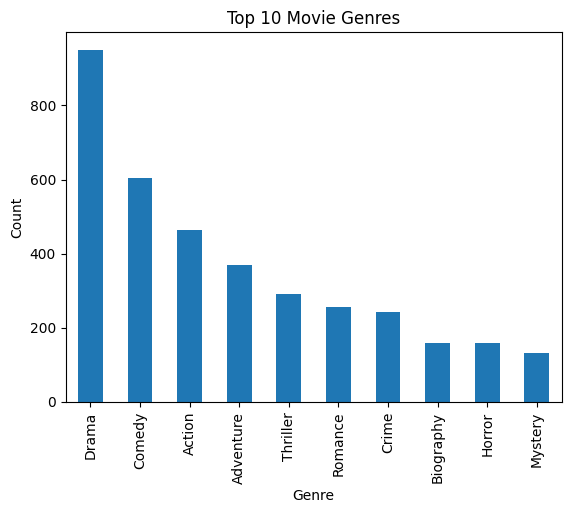

In [22]:
# creating a bar graph for the top 10 categories

genre_counts.head(10).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Movie Genres')

*Now let's get to know how the `average ratings` are distributed in this dataset*

Text(0.5, 1.0, 'Distribution of Average Ratings')

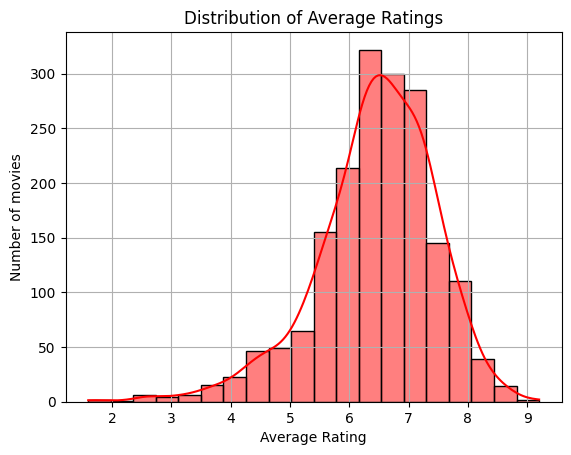

In [23]:
# ploting a histogram on the distribution of average rating against number of movies
# kde=True - Kernel density estimate curve
# plt.grid - adds background

sns.histplot(df['averagerating'], bins=20, kde=True, color='red', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of movies')
plt.grid(True)
plt.title('Distribution of Average Ratings')

*This is a `negatively skewed` distribution as the `mean < median`.*

*This is likely due to low-value outliers pulling the mean down*

-BIvariate Analysis

Let's now check how movie production has changed over the years, by grouping the `year column` and counting how many movies were released each year.

Then visualize using a line graph

In [24]:
# STEP 1: grouping by year and counting the number of movies

movies_per_year = df.groupby('year')['title'].count()
movies_per_year

,title
year,
2010,225
2011,267
2012,215
2013,185
2014,206
2015,185
2016,186
2017,174
2018,160


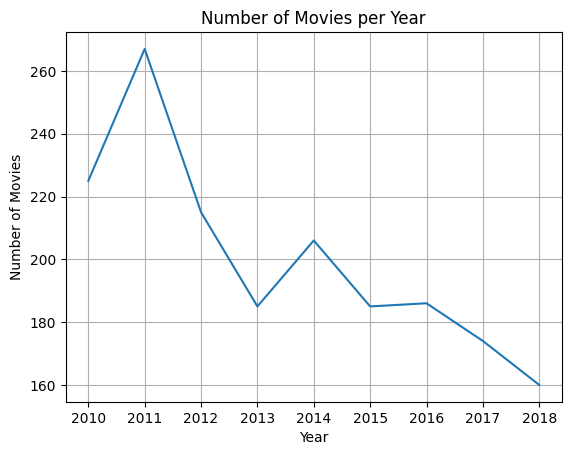

In [25]:
# STEP 2: plotting a line chart

sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
plt.grid(True)

Movie production showed a `steady rise` from 2010-2011 having its `peak` in 2011.

From year 2012-2013 there was a sharp `decline` but had a slight rise again in year 2014, and by year 2015-2018 there was a `steady decline` in movie production. This may be attributed to external factors ie, economical factors.



*Let's find the correlation  in the numerical columns of the dataset, then visualize the information using a heatmap*

In [26]:
# finding the correlation in the numerical columns

df[['averagerating', 'domestic_gross', 'foreign_gross', 'total_gross']].corr()

,averagerating,domestic_gross,foreign_gross,total_gross
averagerating,1.000000,0.169860,0.150446,0.165889
domestic_gross,0.169860,1.000000,0.788834,0.911951
foreign_gross,0.150446,0.788834,1.000000,0.971550
total_gross,0.165889,0.911951,0.971550,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

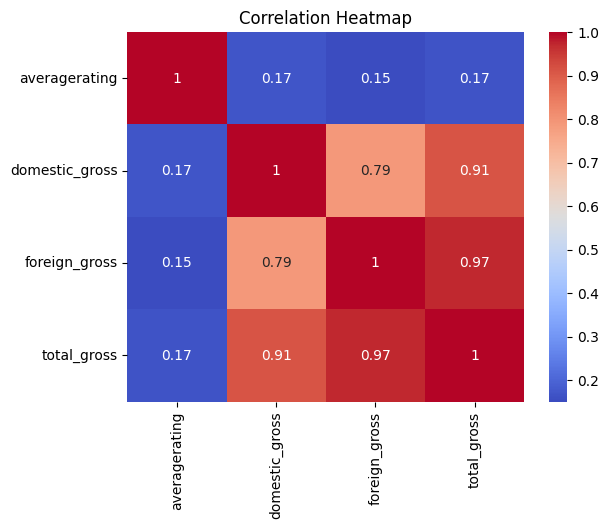

In [27]:
# plotting a heat map for the correlation

sns.heatmap(df[['averagerating', 'domestic_gross', 'foreign_gross', 'total_gross']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

*`1.0` - perfect positive correlation*

*`0.0` - no correlation*

*`-1.0` - perfect negative correlation*

- There is a strong positive correlation between `total_gross` and `foreign_gross` meaning they increase together. Also between `total_gross` and `domestic_gross`.

- There is `almost` No correlation between `averagerating` and the rest.

Let's analyze the relationship between `genres`(categorical) and `total_gross` (numerical) so we can find which genre tends to perform better based on total gross. Then use a bar graph to analyze

In [28]:
# Create a new DataFrame with one genre per row
# using .explode() method to transform genre column into multiple rows

df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')

# Group by genre and calculate the mean of total_gross
genre_gross = df_exploded.groupby('genres')['total_gross'].mean().sort_values(ascending=False)
genre_gross

,total_gross
genres,
Sci-Fi,3.417613e+08
Adventure,3.242341e+08
Animation,3.149661e+08
Action,2.285805e+08
Fantasy,2.128272e+08
Family,1.597097e+08
Musical,1.285734e+08
Comedy,1.266192e+08
Sport,1.235215e+08


/tmp/ipython-input-3874385983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='viridis')


Text(0.5, 1.0, 'Average Total Gross by Genre')

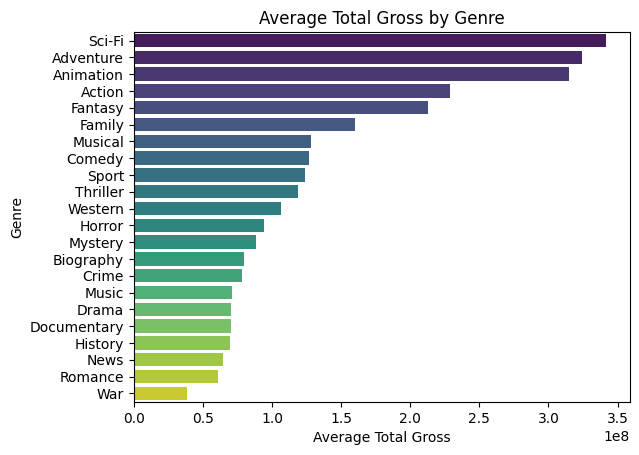

In [38]:
# plotting the relationship using a bar graph

sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='viridis')
plt.xlabel('Average Total Gross')
plt.ylabel('Genre')
plt.title('Average Total Gross by Genre')


*The highest genre earners are `sci-fi, adventure, animation`, While the lowest earners are `news, romance and war` respectively*

*Although `drama and comedy` are in the top 10 movie genres produced in this dataset, their `gross revenue` is not that high*, while `sci-fi` and `animation` are not in the top 10 movie genres but their `gross revenue` are among the highest. This may be due to the target audience as some genres are targeting global audience while some domestic audience.

-Multivariate Analysis

*Exploring the relationship between `foreign and domestic gross` across `different genres`*

Text(0.5, 1.0, 'Foreign vs Domestic Gross by Genre')

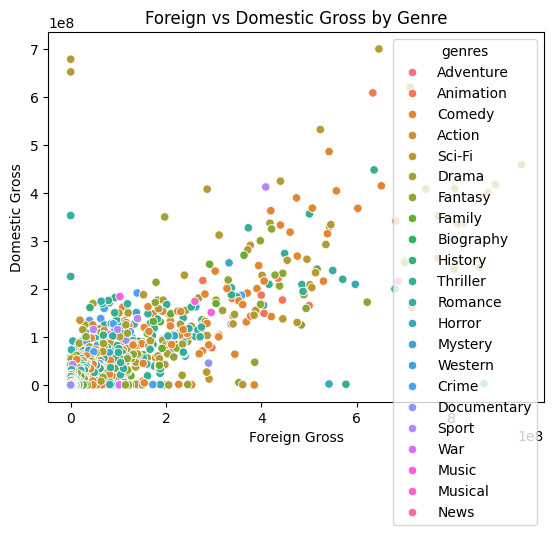

In [30]:
sns.scatterplot(data=df_exploded, x='foreign_gross', y='domestic_gross', hue='genres')
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign vs Domestic Gross by Genre')

In the code below, by Exploring linear trends for each genre, this will create small regression plots per genre for clear visualization.

Text(0.5, 1.0, 'Foreign vs Domestic Gross by Genre')

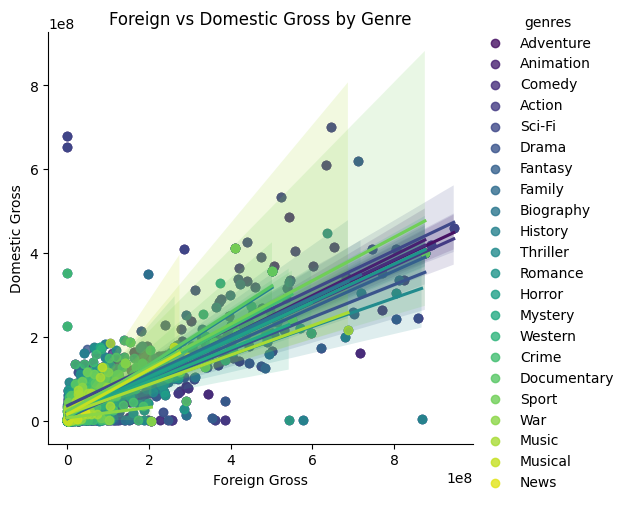

In [31]:
# Trendline regression by genre

sns.lmplot(data=df_exploded, x='foreign_gross', y='domestic_gross', hue='genres', palette='viridis')
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Foreign vs Domestic Gross by Genre')

- A `steeper trendline` indicates that movies in that genre tend to earn more `foreign gross as domestic gross increases` for example `action, sci-fi and animationd genres`

- A `flat or weak slope` suggests foreign earnings do not scale much with domestic success. For example `comedy and drama genres`. humor may not translate globally, due to maybe language barriers or cultural differences

# RECOMMENDATIONS

- Invest more on high perfoming genres, such as:
  
   1. `Action and Animation genres` for box office success as they have high revenues.

   2. `Drama and Comedy genres` for high ratings tailor made for domestic audiences, due to cultural differences.

- Invest in marketing strategies to boost visibility of a movie.
- Make your films stand out with great scripts and unique story telling. This will help when movie productions increases hence great market saturation.
- Limit overproduction of genres with low ratings and revenues, for instance, `horror genre`.
- some genres tend to earn awards due to long term cultural values they have, like, `Documentary,Biography genres`.
- Make sure before a movie production you analyze the target audiences, so as to know how much to invest and expected revenues to be expected.



# CONCLUSION

This data has provided a rich overview of the movie/film industry, hence, this analysis has lead to some insights into the industry. For example:

- Revenue patterns can differ by market, ie, some genres have global tractions and others show strong performance domestically.
- Genres influence both ratings and revenues.
- Ratings are not always aligned with revenues, for instance, high rated films are not always bringing high revenues.

By using past data and analyzing it, stakeholders can make more informed and strategic decisions so as to maximize the reach to target audiences.